In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
import csv
scripts_path = os.path.abspath(os.path.join('../scripts/'))
data_path = os.path.abspath(os.path.join('../data/'))
sys.path.append(scripts_path)
sys.path.append(data_path)
    

In [3]:
scripts_path

'/home/treharne/Documents/projects/SAZO/scripts'

In [4]:
path = data_path + '/T/160609_A_extract_d.txt'

In [5]:
path

'/home/treharne/Documents/projects/SAZO/data/T/160609_A_extract_d.txt'

In [6]:
f = open(path, 'rb')
reader = csv.reader(f)
data = []
for line in reader:
    #nice and pythonic here
    data.append([float(x) for x in line[0].split(' ')])

In [7]:
len(data)

100

In [8]:
trans_data = np.transpose(data)

In [9]:
x = []
y = []
for i in range(0, 10):
    if i % 2 == 0:
        for j in range(0, 10):
            x.append((j-4.5)*10)
            y.append((4.5-i)*10)
    else:
        for j in range(0, 10):
            x.append((4.5 - j)*10)
            y.append((4.5-i)*10)
            
z = trans_data[2]
plasma = trans_data[3]

In [10]:
darray = x,y,z
parray = x,y,plasma

In [11]:
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)

In [68]:
zi = griddata(x, y, z, xi, yi)
plasmai = griddata(x,y,plasma,xi,yi)

#can you rotate above?
#anti-clockwise rotation of 216 deg
deg = 216
theta = deg*(pi/180)
cos(theta)
darray2 = [array(darray[0])*cos(theta)-array(darray[1])*sin(theta), array(darray[0])*sin(theta)+array(darray[1])*cos(theta), darray[2]]
zi2 = griddata(darray2[0], darray2[1], darray2[2]*0.01, xi, yi)

zi3 = (zi2/(zi2+zi))

Populating the interactive namespace from numpy and matplotlib


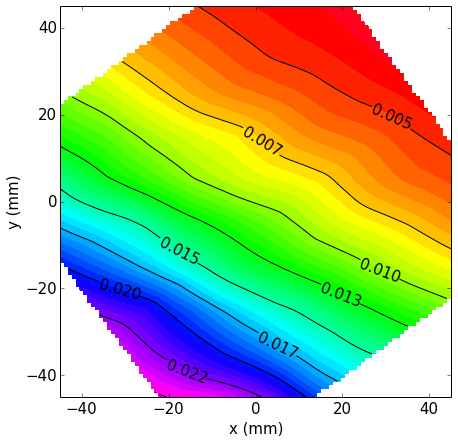

In [71]:
%pylab inline
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

S = ax.contour(xi, yi, zi3, 10, colors='k')
CF = ax.contourf(xi, yi, zi3, 50, cmap='gist_rainbow')
ax.clabel(S, fontsize=15, fmt='%1.3f')

ax.set_xlabel('x (mm)', fontsize=15)
ax.set_ylabel('y (mm)', fontsize=15)
ax.tick_params(labelsize=15)

In [61]:
#can you rotate above?
#anti-clockwise rotation of 216 deg
deg = 216
theta = deg*(pi/180)
cos(theta)
darray2 = [array(darray[0])*cos(theta)-array(darray[1])*sin(theta), array(darray[0])*sin(theta)+array(darray[1])*cos(theta), darray[2]]
zi2 = griddata(darray2[0], darray2[1], darray2[2], xi, yi)


In [53]:
rs_path = data_path + '/4PP/160609_A.txt'

In [15]:
rs_path

'/home/treharne/Documents/projects/SAZO/data/4PP/160609_A.txt'

In [16]:
import rs_contour as cont

In [17]:
rs = cont.get_data(rs_path)

In [18]:
def sortthis(array):
    sort1 = sorted(array, key=lambda x: x[0])
    sort2 = sorted(sort1, key=lambda x: x[1])
    
    return sort2

In [19]:
A = sortthis(np.transpose(darray))
B = sortthis(np.transpose(rs))
D = sortthis(np.transpose(parray))

#rho =(transpose(A)[2]*transpose(B)[2])



In [72]:
def formatthis(array):
    x = array[0]
    y = array[1]
    z = array[2]

    xi = np.linspace(min(x), max(x), 100)
    yi = np.linspace(min(y), max(y), 100)
    zi = griddata(x, y, z, xi, yi)
    
    return xi, yi, zi

In [73]:
Ai = formatthis(np.transpose(A))
Bi = formatthis(np.transpose(B))
Ci = (Ai[2]*Bi[2]*4.532*1e-7) #resistivity
Di = (formatthis(np.transpose(D))[2])
di = Ai[2]


In [77]:
mobi = 1/(Ci*Di)

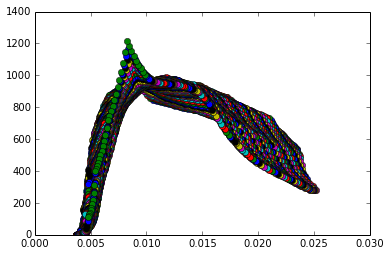

In [79]:
plot(zi3, mobi, 'o')

<a list of 10 text.Text objects>

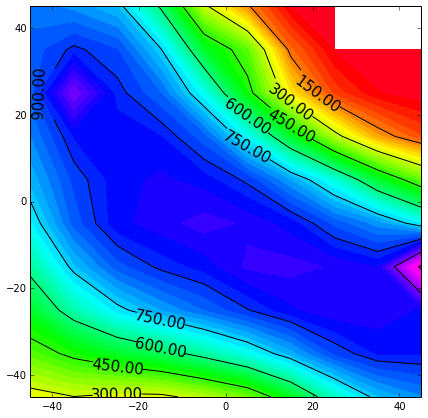

In [23]:
#plot of resistivity 
#NB. not real. mixed data from two similar samples
#4PP from 160602, d-prof from 160601
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

S = ax.contour(Ai[0], Ai[1], mobi, 10, colors='k')
CF = ax.contourf(Ai[0], Ai[1], mobi, 50, cmap='gist_rainbow')
ax.clabel(S, fontsize=15, fmt='%1.2f')

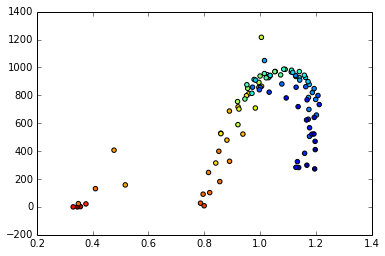

In [24]:
scatter(Di, mobi, c=di)

/usr/lib/python2.7/dist-packages/numpy/ma/core.py:790: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


<a list of 237 text.Text objects>

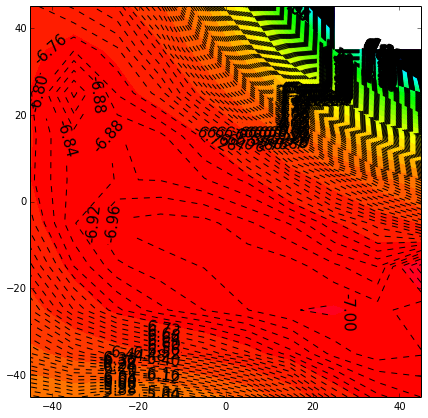

In [25]:
#plot of resistivity 
#NB. not real. mixed data from two similar samples
#4PP from 160602, d-prof from 160601
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

S = ax.contour(Ai[0], Ai[1], np.log(Ci), 300, colors='k')
CF = ax.contourf(Ai[0], Ai[1], np.log(Ci), 50, cmap='gist_rainbow')
ax.clabel(S, fontsize=15, fmt='%1.2f')